# **Imports and configurations**

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -O ./spark-3.3.1-bin-hadoop3.tgz  https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
!tar zxvf ./spark-3.3.1-bin-hadoop3.tgz
!pip install findspark

--2023-02-12 10:26:53--  https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299350810 (285M) [application/x-gzip]
Saving to: ‘./spark-3.3.1-bin-hadoop3.tgz’

./spark-3.3.1-bin-h 100%[===================>] 285.48M   167MB/s    in 1.7s    

2023-02-12 10:26:55 (167 MB/s) - ‘./spark-3.3.1-bin-hadoop3.tgz’ saved [299350810/299350810]

spark-3.3.1-bin-hadoop3/
spark-3.3.1-bin-hadoop3/LICENSE
spark-3.3.1-bin-hadoop3/NOTICE
spark-3.3.1-bin-hadoop3/R/
spark-3.3.1-bin-hadoop3/R/lib/
spark-3.3.1-bin-hadoop3/R/lib/SparkR/
spark-3.3.1-bin-hadoop3/R/lib/SparkR/DESCRIPTION
spark-3.3.1-bin-hadoop3/R/lib/SparkR/INDEX
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/Rd.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/features.rds
spark-3

In [ ]:
import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

In [ ]:
import findspark
import random
findspark.init()
import numpy as np
import pyspark
from pyspark.rdd import RDD
from pyspark import SparkContext
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('FIFA').getOrCreate()
import urllib.request

In [ ]:
!mkdir ./datasets

!wget https://sports-statistics.com/database/fifa/fifa_2022_datasets.zip -p ./datasets/

!unzip /content/sports-statistics.com/database/fifa/fifa_2022_datasets.zip -d ./datasets/

--2023-02-12 10:27:15--  https://sports-statistics.com/database/fifa/fifa_2022_datasets.zip
Resolving sports-statistics.com (sports-statistics.com)... 109.70.148.56
Connecting to sports-statistics.com (sports-statistics.com)|109.70.148.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113905463 (109M) [application/zip]
Saving to: ‘sports-statistics.com/database/fifa/fifa_2022_datasets.zip’

sports-statistics.c 100%[===================>] 108.63M  26.0MB/s    in 4.7s    

2023-02-12 10:27:20 (23.3 MB/s) - ‘sports-statistics.com/database/fifa/fifa_2022_datasets.zip’ saved [113905463/113905463]

--2023-02-12 10:27:20--  http://./datasets/
Resolving . (.)... failed: No address associated with hostname.
wget: unable to resolve host address ‘.’
FINISHED --2023-02-12 10:27:20--
Total wall clock time: 5.1s
Downloaded: 1 files, 109M in 4.7s (23.3 MB/s)
Archive:  /content/sports-statistics.com/database/fifa/fifa_2022_datasets.zip
  inflating: ./datasets/Career Mode fema

In [ ]:
f15 = spark.read.csv("/content/datasets/players_15.csv", header=True, inferSchema=True)
f16 = spark.read.csv("/content/datasets/players_16.csv", header=True, inferSchema=True)
f17 = spark.read.csv("/content/datasets/players_17.csv", header=True, inferSchema=True)
f18 = spark.read.csv("/content/datasets/players_18.csv", header=True, inferSchema=True)
f19 = spark.read.csv("/content/datasets/players_19.csv", header=True, inferSchema=True)
f20 = spark.read.csv("/content/datasets/players_20.csv", header=True, inferSchema=True)
f21 = spark.read.csv("/content/datasets/players_21.csv", header=True, inferSchema=True)
f22 = spark.read.csv("/content/datasets/players_22.csv", header=True, inferSchema=True)\
.withColumnRenamed('short_name','name').withColumnRenamed('value_eur','value').withColumnRenamed('club_contract_valid_until','contract').withColumnRenamed('nationality_name','nationality')

In [ ]:
f22.show(20)

+---------+--------------------+-----------------+--------------------+----------------+-------+---------+-------+--------+---+-------------------+---------+---------+------------+-------------------+--------------------+------------+-------------+------------------+----------------+-------------------+--------+--------------+--------------+--------------+---------------+--------------------+--------------+---------+-----------+------------------------+-------------+----------------+---------+------------------+--------------------+--------------------+----+--------+-------+---------+---------+------+------------------+-------------------+--------------------------+-----------------------+-----------------+---------------+-----------+-----------------+------------------+------------------+---------------------+---------------------+----------------+------------------+----------------+----------------+-------------+-------------+--------------+----------------+--------------------+-----

In [ ]:
f22.count()

19239

In [ ]:
f22.printSchema()

root
 |-- sofifa_id: integer (nullable = true)
 |-- player_url: string (nullable = true)
 |-- name: string (nullable = true)
 |-- long_name: string (nullable = true)
 |-- player_positions: string (nullable = true)
 |-- overall: integer (nullable = true)
 |-- potential: integer (nullable = true)
 |-- value: double (nullable = true)
 |-- wage_eur: double (nullable = true)
 |-- age: integer (nullable = true)
 |-- dob: timestamp (nullable = true)
 |-- height_cm: integer (nullable = true)
 |-- weight_kg: integer (nullable = true)
 |-- club_team_id: double (nullable = true)
 |-- club_name: string (nullable = true)
 |-- league_name: string (nullable = true)
 |-- league_level: integer (nullable = true)
 |-- club_position: string (nullable = true)
 |-- club_jersey_number: integer (nullable = true)
 |-- club_loaned_from: string (nullable = true)
 |-- club_joined: timestamp (nullable = true)
 |-- contract: integer (nullable = true)
 |-- nationality_id: integer (nullable = true)
 |-- nationality: 

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

# General

In [ ]:
f22_small = f22.select(['name','player_positions','overall','potential','value','age','nationality','weak_foot','skill_moves','pace','shooting','passing','dribbling','defending'])

In [ ]:
f22_small.show()
f22.withColumn("value",f22.value.cast('int'))

+-----------------+----------------+-------+---------+-------+---+--------------+---------+-----------+----+--------+-------+---------+---------+
|             name|player_positions|overall|potential|  value|age|   nationality|weak_foot|skill_moves|pace|shooting|passing|dribbling|defending|
+-----------------+----------------+-------+---------+-------+---+--------------+---------+-----------+----+--------+-------+---------+---------+
|         L. Messi|      RW, ST, CF|     93|       93|  7.8E7| 34|     Argentina|        4|          4|  85|      92|     91|       95|       34|
|   R. Lewandowski|              ST|     92|       92|1.195E8| 32|        Poland|        4|          4|  78|      92|     79|       86|       44|
|Cristiano Ronaldo|          ST, LW|     91|       91|  4.5E7| 36|      Portugal|        4|          5|  87|      94|     80|       88|       34|
|        Neymar Jr|         LW, CAM|     91|       91| 1.29E8| 29|        Brazil|        5|          5|  91|      83|     86

DataFrame[sofifa_id: int, player_url: string, name: string, long_name: string, player_positions: string, overall: int, potential: int, value: int, wage_eur: double, age: int, dob: timestamp, height_cm: int, weight_kg: int, club_team_id: double, club_name: string, league_name: string, league_level: int, club_position: string, club_jersey_number: int, club_loaned_from: string, club_joined: timestamp, contract: int, nationality_id: int, nationality: string, nation_team_id: double, nation_position: string, nation_jersey_number: int, preferred_foot: string, weak_foot: int, skill_moves: int, international_reputation: int, work_rate: string, body_type: string, real_face: string, release_clause_eur: int, player_tags: string, player_traits: string, pace: int, shooting: int, passing: int, dribbling: int, defending: int, physic: int, attacking_crossing: int, attacking_finishing: int, attacking_heading_accuracy: int, attacking_short_passing: int, attacking_volleys: int, skill_dribbling: int, skill

In [ ]:
assembler = VectorAssembler(
    inputCols = ['overall','potential','age','pace'],
    outputCol = "features",
    handleInvalid = 'keep'
)

In [ ]:
f22_small = f22_small.na.drop()

In [ ]:
f22_small.show()

+-----------------+----------------+-------+---------+-------+---+--------------+---------+-----------+----+--------+-------+---------+---------+
|             name|player_positions|overall|potential|  value|age|   nationality|weak_foot|skill_moves|pace|shooting|passing|dribbling|defending|
+-----------------+----------------+-------+---------+-------+---+--------------+---------+-----------+----+--------+-------+---------+---------+
|         L. Messi|      RW, ST, CF|     93|       93|  7.8E7| 34|     Argentina|        4|          4|  85|      92|     91|       95|       34|
|   R. Lewandowski|              ST|     92|       92|1.195E8| 32|        Poland|        4|          4|  78|      92|     79|       86|       44|
|Cristiano Ronaldo|          ST, LW|     91|       91|  4.5E7| 36|      Portugal|        4|          5|  87|      94|     80|       88|       34|
|        Neymar Jr|         LW, CAM|     91|       91| 1.29E8| 29|        Brazil|        5|          5|  91|      83|     86

In [ ]:
newf22 = assembler.transform(f22_small)

In [ ]:
newf22.show()

+-----------------+----------------+-------+---------+-------+---+--------------+---------+-----------+----+--------+-------+---------+---------+--------------------+
|             name|player_positions|overall|potential|  value|age|   nationality|weak_foot|skill_moves|pace|shooting|passing|dribbling|defending|            features|
+-----------------+----------------+-------+---------+-------+---+--------------+---------+-----------+----+--------+-------+---------+---------+--------------------+
|         L. Messi|      RW, ST, CF|     93|       93|  7.8E7| 34|     Argentina|        4|          4|  85|      92|     91|       95|       34|[93.0,93.0,34.0,8...|
|   R. Lewandowski|              ST|     92|       92|1.195E8| 32|        Poland|        4|          4|  78|      92|     79|       86|       44|[92.0,92.0,32.0,7...|
|Cristiano Ronaldo|          ST, LW|     91|       91|  4.5E7| 36|      Portugal|        4|          5|  87|      94|     80|       88|       34|[91.0,91.0,36.0,8...

In [ ]:
finalf22 = newf22.select('features','value')

In [ ]:
train_data, test_data = finalf22.randomSplit([0.7,0.3])

In [ ]:
train_data.describe().show()

+-------+------------------+
|summary|             value|
+-------+------------------+
|  count|             11862|
|   mean|2878630.0792446467|
| stddev| 7353061.250220709|
|    min|           15000.0|
|    max|            1.29E8|
+-------+------------------+



In [ ]:
test_data.describe().show()

+-------+-----------------+
|summary|            value|
+-------+-----------------+
|  count|             5179|
|   mean|3163092.295810002|
| stddev| 8489506.17315841|
|    min|          45000.0|
|    max|           1.94E8|
+-------+-----------------+



# Visualization

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

fifa = pd.read_csv("/content/datasets/players_22.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]
    
def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]





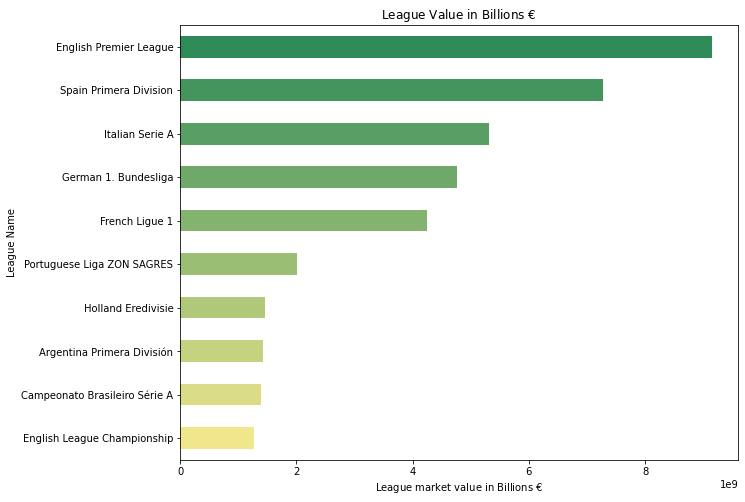

In [ ]:
color2 = "#2E8B57"
color1 = "#F0E68C"

leaguevalue = fifa.groupby('league_name').sum('value_eur').sort_values('value_eur', ascending = False)
leaguevalue = leaguevalue['value_eur'].head(10).sort_values(ascending = True)
fig= plt.figure(figsize = (10,8))
leaguevalue.plot.barh(color = get_color_gradient(color1, color2, 10));
plt.xlabel('League market value in Billions $\N{euro sign}$');
plt.ylabel('League Name');
plt.title('League Value in Billions $\N{euro sign}$');

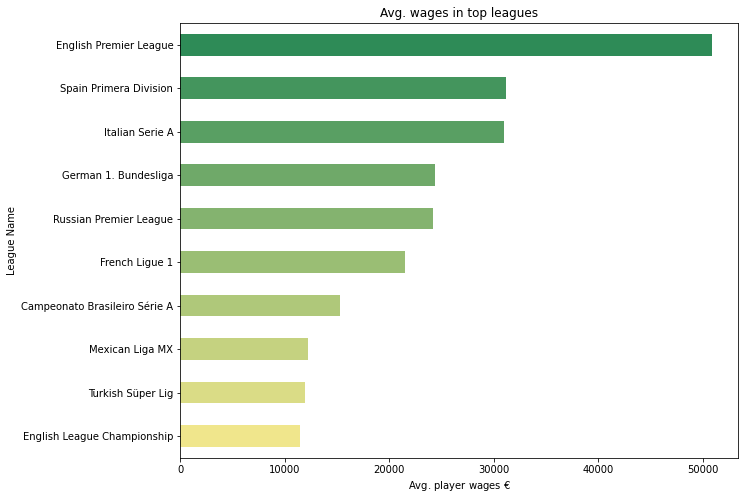

In [ ]:
color2 = "#2E8B57"
color1 = "#F0E68C"

meanwage = fifa.groupby('league_name').mean('wage_eur').sort_values('wage_eur', ascending = False)
meanwage = meanwage['wage_eur'].head(10).sort_values(ascending = True)
fig= plt.figure(figsize = (10,8))
meanwage.plot.barh(color = get_color_gradient(color1, color2, 10));
plt.xlabel('Avg. player wages $\N{euro sign}$')
plt.ylabel('League Name')
plt.title('Avg. wages in top leagues');

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,241095,https://sofifa.com/player/241095/nikola-vlasic...,N. Vlašić,Nikola Vlašić,CAM,80,86,33500000.0,66000.0,23,...,57+2,57+2,57+2,61+2,18+2,https://cdn.sofifa.net/players/241/095/22_120.png,https://cdn.sofifa.net/teams/19/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/hr.png
505,243576,https://sofifa.com/player/243576/pedro-antonio...,Pedro Porro,Pedro Antonio Porro Sauceda,"RWB, RM",80,87,40500000.0,80000.0,21,...,74+2,74+2,74+2,77+2,16+2,https://cdn.sofifa.net/players/243/576/22_120.png,https://cdn.sofifa.net/teams/237/60.png,https://cdn.sofifa.net/flags/pt.png,NaN,https://cdn.sofifa.net/flags/es.png
506,244369,https://sofifa.com/player/244369/viktor-tsygan...,V. Tsygankov,Viktor Tsygankov,RM,80,86,33500000.0,1000.0,23,...,51+2,51+2,51+2,61+2,16+2,https://cdn.sofifa.net/players/244/369/22_120.png,https://cdn.sofifa.net/teams/101047/60.png,https://cdn.sofifa.net/flags/ua.png,https://cdn.sofifa.net/teams/1366/60.png,https://cdn.sofifa.net/flags/ua.png
507,244470,https://sofifa.com/player/244470/vladimir-couf...,V. Coufal,Vladimír Coufal,"RB, RWB",80,80,19000000.0,73000.0,28,...,78+2,78+2,78+2,78+2,18+2,https://cdn.sofifa.net/players/244/470/22_120.png,https://cdn.sofifa.net/teams/19/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1330/60.png,https://cdn.sofifa.net/flags/cz.png


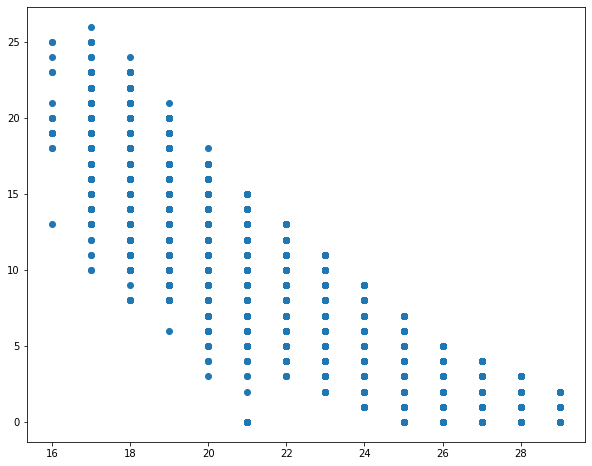

In [ ]:
above80 = fifa[fifa['overall'] > 79]
fifa['potential_delta'] = fifa['potential'] - fifa['overall']
youngpot = fifa[fifa['age'] < 30]

fig = plt.figure(figsize = (10,8))
plt.scatter(x = youngpot['age'], y = youngpot['potential_delta'])
color2 = "#2E8B57"
color1 = "#F0E68C"

above80

<Figure size 1440x1296 with 0 Axes>

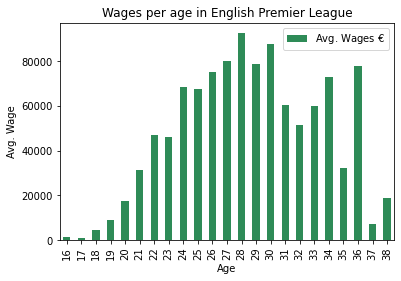

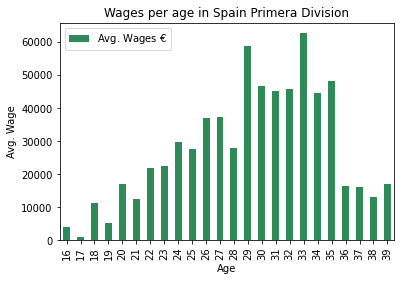

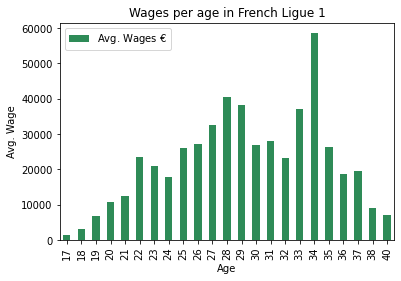

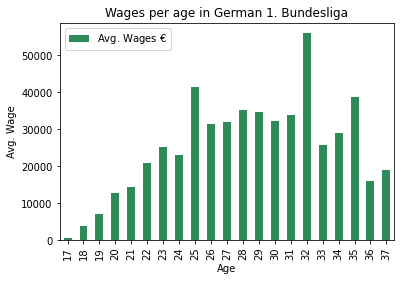

In [ ]:
leagues = ['English Premier League','Spain Primera Division','French Ligue 1','German 1. Bundesliga']

def plotage_wage_league(a):
      fig = plt.figure(figsize = (20,18))
      for i in range(len(a)):
        z = fifa[fifa['league_name'] == a[i]]
        z = z.groupby('age').mean('wage_eur')
        z['age'] = z.index
        z = z[['wage_eur','age']]
        ax = z.plot.bar(x = 'age', y = 'wage_eur', color = "#2E8B57", label = 'Avg. Wages $\N{euro sign}$');
        ax.set_xlabel('Age');
        ax.set_ylabel('Avg. Wage');
        name = a[i]
        ax.set_title(f'Wages per age in {name}');

plotage_wage_league(leagues)


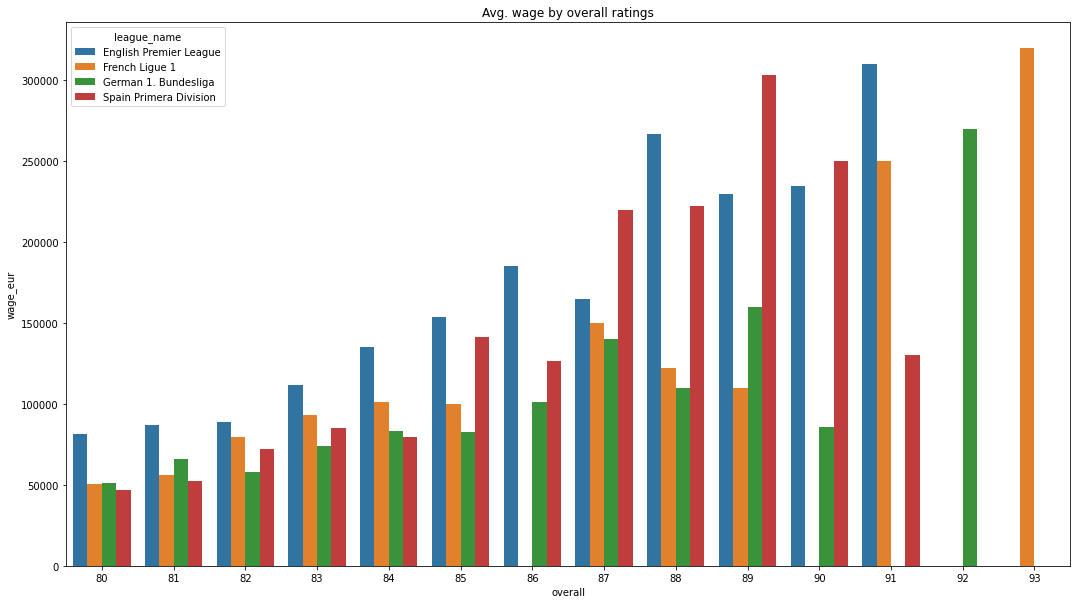

In [ ]:
leagues = ['English Premier League','Spain Primera Division','French Ligue 1','German 1. Bundesliga']
wagecheck = above80
wagecheck = wagecheck[wagecheck['league_name'].isin(leagues)]

wagecheck = wagecheck.groupby(['league_name','overall']).mean('wage_eur')

a = wagecheck['wage_eur']
b = pd.DataFrame(a)
b = b.reset_index()

fig = plt.figure(figsize = (18,10))
sns.barplot(data = b, x = 'overall', y = 'wage_eur', hue = 'league_name')
plt.title('Avg. wage by overall ratings');

# Team Builder

In [ ]:
from pyspark.sql.functions import *
from pyspark.sql.functions import col, mean, udf, count, when, isnull, collect_set, min, monotonically_increasing_id, cast
import itertools
import copy
from pyspark.sql import Row
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
f_22 = spark.read.csv("/content/datasets/players_22.csv", header=True,  encoding="utf-8", inferSchema=True, multiLine=True)\
.withColumnRenamed('short_name','name').withColumnRenamed('value_eur','value').withColumnRenamed('club_contract_valid_until','contract').withColumnRenamed('nationality_name','nationality')

In [ ]:
f_22.show()

+---------+--------------------+-----------------+--------------------+----------------+-------+---------+-------+--------+---+-------------------+---------+---------+------------+-------------------+--------------------+------------+-------------+------------------+----------------+-------------------+--------+--------------+--------------+--------------+---------------+--------------------+--------------+---------+-----------+------------------------+-------------+----------------+---------+------------------+--------------------+--------------------+----+--------+-------+---------+---------+------+------------------+-------------------+--------------------------+-----------------------+-----------------+---------------+-----------+-----------------+------------------+------------------+---------------------+---------------------+----------------+------------------+----------------+----------------+-------------+-------------+--------------+----------------+--------------------+-----

In [ ]:
#pick intersting features
f1_22 = f_22.select(["name",'player_positions', 'overall', 'potential','value', 'wage_eur', 'club_name', 'pace','shooting','passing','dribbling','defending','physic'])
f1_22.withColumn("value",f1_22.value.cast('int'))
f1_22.withColumn("wage_eur",f1_22.wage_eur.cast('int'))
f1_22.printSchema()

root
 |-- name: string (nullable = true)
 |-- player_positions: string (nullable = true)
 |-- overall: integer (nullable = true)
 |-- potential: integer (nullable = true)
 |-- value: double (nullable = true)
 |-- wage_eur: double (nullable = true)
 |-- club_name: string (nullable = true)
 |-- pace: integer (nullable = true)
 |-- shooting: integer (nullable = true)
 |-- passing: integer (nullable = true)
 |-- dribbling: integer (nullable = true)
 |-- defending: integer (nullable = true)
 |-- physic: integer (nullable = true)



In [ ]:
#count null value
f1_22.select([count(when(isnull(c), c)).alias(c) for c in f1_22.columns]).show()

+----+----------------+-------+---------+-----+--------+---------+----+--------+-------+---------+---------+------+
|name|player_positions|overall|potential|value|wage_eur|club_name|pace|shooting|passing|dribbling|defending|physic|
+----+----------------+-------+---------+-----+--------+---------+----+--------+-------+---------+---------+------+
|   0|               0|      0|        0|   74|      61|       61|2132|    2132|   2132|     2132|     2132|  2132|
+----+----------------+-------+---------+-----+--------+---------+----+--------+-------+---------+---------+------+



In [ ]:
#dropping players with no value
f1_22 = f1_22.dropna(subset=['value'])
f1_22.filter(f1_22.player_positions == "GK").select([count(when(isnull(c), c)).alias(c) for c in f1_22.columns]).show()
#we can see that must of that all the goal keeper have null value in pace|shooting|passing|dribbling|defending|physic features


+----+----------------+-------+---------+-----+--------+---------+----+--------+-------+---------+---------+------+
|name|player_positions|overall|potential|value|wage_eur|club_name|pace|shooting|passing|dribbling|defending|physic|
+----+----------------+-------+---------+-----+--------+---------+----+--------+-------+---------+---------+------+
|   0|               0|      0|        0|    0|       0|        0|2124|    2124|   2124|     2124|     2124|  2124|
+----+----------------+-------+---------+-----+--------+---------+----+--------+-------+---------+---------+------+



In [ ]:
#adding mean value for the goal keeper null value
means = f1_22.agg({col: 'mean' for col in ['pace','shooting','passing','dribbling','defending', 'physic']}).collect()[0]

means1 = [means[i] for i in range(6)]
subset=['pace','shooting','passing','dribbling','defending', 'physic']

for i in range(6):
  f1_22 = f1_22.na.fill(means1[i], subset[i])


In [ ]:
#check null again
f1_22.select([count(when(isnull(c), c)).alias(c) for c in f1_22.columns]).show()

+----+----------------+-------+---------+-----+--------+---------+----+--------+-------+---------+---------+------+
|name|player_positions|overall|potential|value|wage_eur|club_name|pace|shooting|passing|dribbling|defending|physic|
+----+----------------+-------+---------+-----+--------+---------+----+--------+-------+---------+---------+------+
|   0|               0|      0|        0|    0|       0|        0|   0|       0|      0|        0|        0|     0|
+----+----------------+-------+---------+-----+--------+---------+----+--------+-------+---------+---------+------+



In [ ]:
#keep the firdt position to players who have mire then 1 position
def split_and_keep_first(s):
  return s.split(",")[0]

split_and_keep_first_udf = udf(split_and_keep_first)

f1_22 = f1_22.withColumn("player_positions",split_and_keep_first_udf(f1_22["player_positions"]))

#adding score feature, based on other features
f1_22 = f1_22.withColumn('score', round(f1_22.overall*0.5 +f1_22.potential*0.2 + f1_22.shooting*0.05 + f1_22.pace*0.05 + f1_22.passing*0.05 + f1_22.dribbling*0.05 + f1_22.defending*0.05 + f1_22.physic*0.05,3)) 
f1_22 = f1_22.withColumn("score",f1_22.score.cast('float'))
f1_22 = f1_22.withColumn("value",f1_22.value.cast('int'))
f1_22.show()


+-----------------+----------------+-------+---------+---------+--------+-------------------+----+--------+-------+---------+---------+------+-----+
|             name|player_positions|overall|potential|    value|wage_eur|          club_name|pace|shooting|passing|dribbling|defending|physic|score|
+-----------------+----------------+-------+---------+---------+--------+-------------------+----+--------+-------+---------+---------+------+-----+
|         L. Messi|              RW|     93|       93| 78000000|320000.0|Paris Saint-Germain|  85|      92|     91|       95|       34|    65| 88.2|
|   R. Lewandowski|              ST|     92|       92|119500000|270000.0|  FC Bayern München|  78|      92|     79|       86|       44|    82|87.45|
|Cristiano Ronaldo|              ST|     91|       91| 45000000|270000.0|  Manchester United|  87|      94|     80|       88|       34|    75| 86.6|
|        Neymar Jr|              LW|     91|       91|129000000|270000.0|Paris Saint-Germain|  91|      83

In [ ]:
f2_22 = f1_22.select(['name', 'player_positions', 'value','score','club_name'])

In [ ]:
f2_22.agg(collect_set('player_positions')).collect()

[Row(collect_set(player_positions)=['RW', 'CM', 'RM', 'CF', 'RWB', 'GK', 'CAM', 'LB', 'RB', 'CB', 'LM', 'CDM', 'LW', 'ST', 'LWB'])]

In [ ]:
#aggregate close positions to same position
f2_22 = f2_22.withColumn("player_positions", when(col("player_positions").isin(["CDM", "CAM", "LM","RM"]), "CM").otherwise(col("player_positions")))
f2_22 = f2_22.withColumn("player_positions", when(col("player_positions").isin("CF"), "ST").otherwise(col("player_positions")))
f2_22 = f2_22.withColumn("player_positions", when(col("player_positions").isin("RWB"), "RB").otherwise(col("player_positions")))
f2_22 = f2_22.withColumn("player_positions", when(col("player_positions").isin("LWB"), "LB").otherwise(col("player_positions")))
print(f2_22.agg(collect_set('player_positions')).collect())

[Row(collect_set(player_positions)=['RW', 'RB', 'CM', 'CB', 'GK', 'LW', 'ST', 'LB'])]


In [ ]:
#change the value to be in milion of euro
f2_22 = f2_22.withColumn("id", monotonically_increasing_id())
f2_22 = f2_22.withColumn("value", col("value") / 1000000)

In [ ]:
f2_22 = f2_22.select(["name","player_positions", round(f2_22['value'],0).cast("integer").alias('value'),"score","id", "club_name"])
f2_22.show()

+-----------------+----------------+-----+-----+---+-------------------+
|             name|player_positions|value|score| id|          club_name|
+-----------------+----------------+-----+-----+---+-------------------+
|         L. Messi|              RW|   78| 88.2|  0|Paris Saint-Germain|
|   R. Lewandowski|              ST|  120|87.45|  1|  FC Bayern München|
|Cristiano Ronaldo|              ST|   45| 86.6|  2|  Manchester United|
|        Neymar Jr|              LW|  129| 86.4|  3|Paris Saint-Germain|
|     K. De Bruyne|              CM|  126|87.95|  4|    Manchester City|
|         J. Oblak|              GK|  112| 81.8|  5| Atlético de Madrid|
|        K. Mbappé|              ST|  194| 88.0|  6|Paris Saint-Germain|
|         M. Neuer|              GK|   14| 80.7|  7|  FC Bayern München|
|    M. ter Stegen|              GK|   99| 81.1|  8|       FC Barcelona|
|          H. Kane|              ST|  130|85.85|  9|  Tottenham Hotspur|
|         N. Kanté|              CM|  100|86.55| 10

In [ ]:
#pick players with value of above 20 million
f3_22 = f2_22.filter(col("value") > 20)
f3_22 = f3_22.select(["name","player_positions", round(f3_22['value'],0).cast("integer").alias('value'),"score","id", "club_name"])
f3_22.count()

520

In [ ]:
#showing how much players there are in same positions
f3_22.groupby("player_positions").agg(count('name')).show()

+----------------+-----------+
|player_positions|count(name)|
+----------------+-----------+
|              LB|         33|
|              LW|         17|
|              GK|         35|
|              RB|         29|
|              CM|        214|
|              RW|         28|
|              CB|         75|
|              ST|         89|
+----------------+-----------+



In [ ]:
#generate 3 lists per position on field
#list of value, of score, of id
def generate_group_by_position(df, pos):
  group_value = []
  group_score = []
  group_id = []
  a =  df.filter(col("player_positions") == pos).collect()
  group_value = [row["value"] for row in a]
  group_score = [row["score"] for row in a]
  group_id = [row["id"] for row in a]
  return group_score, group_value, group_id


In [ ]:
#get as input the output of generate_group_by_positions and if there is demand to more then 1 player in same positions - r number.
#it generates all the combination of this number sum the score,sum the value, save indexes as list of list
#the output is the same as generate_group_by_position, just after make all thr combination.
def combination_by_position(group_score, group_value, group_id, r):

  if r > 1:
    comb_score = list(itertools.combinations(group_score, r))
    comb_value = list(itertools.combinations(group_value, r))
    group_comb_index = list(itertools.combinations(group_id, r))

    
    group_comb_score = []
    for score_combinations in comb_score:
      score_sum = np.sum(score_combinations)
      group_comb_score.append(score_sum)

    group_comb_value = []
    for value_combinations in comb_value:
      value_sum = np.sum(value_combinations)
      group_comb_value.append(value_sum)

  else:
    group_comb_score = group_score
    group_comb_value = group_value
    group_comb_index = list(itertools.combinations(group_id, r))


  return group_comb_score, group_comb_value, group_comb_index

In [ ]:
#go over all the formations and generate per positions it' list by calling to the 2 former function.
#save all list as list of lists.
#list of scores thet include the list of score per position
def combination_by_formation(df, positions):
  
  result_comb_score = []
  result_comb_value = []
  result_comb_index = []
  for i in positions:
    gk_score, gk_value, gk_id = generate_group_by_position(df, i[0])
    group_comb_score, group_comb_value, group_comb_index = combination_by_position(gk_score, gk_value, gk_id,i[1] )
    result_comb_score.append(group_comb_score)
    result_comb_value.append(group_comb_value)
    result_comb_index.append(group_comb_index)

  return result_comb_score , result_comb_value , result_comb_index 

In [ ]:
#choose the cell with the highest score
def get_onepick_solution(scores, paths):
  scores_paths = list(zip(scores, paths))
  scores_paths_by_score = sorted(scores_paths, key=lambda tup: tup[0],
                                  reverse=True)

  return scores_paths_by_score[0][0], scores_paths_by_score[0][1]

In [ ]:
#the main function, go over the input list and insert to list best players it can according to maximum value, the index of the cell represent the max value the cell can hold
#each time it goes from position to position and insert it to the best cell it can
def knapsack_multichoice_onepick(weights, values, max_weight):
  if len(weights) == 0:
      return 0

  last_array = [-1 for _ in range(max_weight + 1)]
  last_path = [[] for _ in range(max_weight + 1)]
  for i in range(len(weights[0])):
      if weights[0][i] < max_weight:
          if last_array[weights[0][i]] < values[0][i]:
              last_array[weights[0][i]] = values[0][i]
              last_path[weights[0][i]] = [(0, i)]

  for i in range(1, len(weights)):
      current_array = [-1 for _ in range(max_weight + 1)]
      current_path = [[] for _ in range(max_weight + 1)]
      for j in range(len(weights[i])):
          for k in range(weights[i][j], max_weight + 1):
              if last_array[k - weights[i][j]] > 0:
                  if current_array[k] < last_array[k - weights[i][j]] + \
                          values[i][j]:
                      current_array[k] = last_array[k - weights[i][j]] + \
                                          values[i][j]
                      current_path[k] = copy.deepcopy(
                          last_path[k - weights[i][j]])
                      current_path[k].append((i, j))
      last_array = current_array
      last_path = current_path

  solution, index_path = get_onepick_solution(last_array, last_path)

  return solution, index_path

In [ ]:
#call all the function above
#plot dataframe of the team that the algorithm picked
def best_teams(df, positions, budget):
       
        result_comb_score , result_comb_value , result_comb_index = combination_by_formation(df, positions)
            

        best_score, best_players_index = knapsack_multichoice_onepick(result_comb_value, result_comb_score, budget)
        
        result_indexes = []
        for comb_index in best_players_index:
            for winning_i in result_comb_index[comb_index[0]][comb_index[1]]:
                result_indexes.append(winning_i)

        print("the score is:", best_score/11)
        return df.filter(col("id").isin(result_indexes))

In [ ]:
#define position
positions1 = [["GK", 1],["CB", 2],["ST",1],["CM",3],["LW", 1],["RW", 1],["LB", 1],["RB", 1]]

In [ ]:
best_team_450 = best_teams(f3_22, positions1, 450)

the score is: 83.32272685657848


In [ ]:
best_team_450.show()

+-----------------+----------------+-----+-----+---+-------------------+
|             name|player_positions|value|score| id|          club_name|
+-----------------+----------------+-----+-----+---+-------------------+
|         L. Messi|              RW|   78| 88.2|  0|Paris Saint-Germain|
|Cristiano Ronaldo|              ST|   45| 86.6|  2|  Manchester United|
|     Sergio Ramos|              CB|   24| 84.7| 22|Paris Saint-Germain|
|        L. Modrić|              CM|   32| 84.1| 32|     Real Madrid CF|
|      W. Szczęsny|              GK|   42| 78.6| 34|           Juventus|
|        K. Walker|              RB|   39|83.05| 80|    Manchester City|
|         D. Alaba|              CB|   36|82.15|107|     Real Madrid CF|
|        F. Kostić|              CM|   43| 82.7|122|Eintracht Frankfurt|
|         M. Acuña|              LB|   37| 82.8|134|         Sevilla FC|
|         Paulinho|              CM|   29| 81.9|148|            Al Ahli|
|       L. Ocampos|              LW|   40|81.75|170

In [ ]:
#make dataframe of the clubs in the game and average their score and value
club_avg1 = f3_22.groupBy('club_name').avg('value', 'score').orderBy('avg(value)')
club_avg1 = club_avg1.orderBy(club_avg1['avg(value)'].desc())
club_avg1 = club_avg1.withColumnRenamed('avg(value)', 'Avg_Player_Value')\
                   .withColumnRenamed('avg(Score)', 'score')
        
club_avg1 = club_avg1.select(['club_name',round(club_avg1["Avg_Player_Value"],0).alias('Avg_Player_Value'),round(club_avg1['score'], 3).alias('score')])
club_avg1.show()

+-------------------+----------------+------+
|          club_name|Avg_Player_Value| score|
+-------------------+----------------+------+
|    Manchester City|            73.0|82.212|
|          Liverpool|            65.0| 81.92|
|  FC Bayern München|            64.0|81.811|
|Paris Saint-Germain|            60.0|81.924|
|       FC Barcelona|            51.0|80.181|
|            Chelsea|            50.0|80.306|
| Atlético de Madrid|            50.0|80.944|
|  Manchester United|            49.0|80.734|
|  Tottenham Hotspur|            48.0|80.108|
|     Real Madrid CF|            48.0|81.053|
|           Juventus|            48.0|80.277|
|              Inter|            44.0| 79.95|
|      Villarreal CF|            43.0|78.975|
|              Lazio|            42.0|79.117|
|Bayer 04 Leverkusen|            39.0|  77.8|
|  Borussia Dortmund|            38.0|79.297|
|      Real Sociedad|            38.0|79.337|
|        Valencia CF|            37.0|79.217|
|             Napoli|            3

In [ ]:
#multiply the avg value by players on field -11
club_avg1 = club_avg1.withColumn("Avg_Player_Value", col("Avg_Player_Value") * 11)
club_avg1 = club_avg1.withColumnRenamed("Avg_Player_Value", "Value")
club_avg1.show()

+-------------------+-----+------+
|          club_name|Value| score|
+-------------------+-----+------+
|    Manchester City|803.0|82.212|
|          Liverpool|715.0| 81.92|
|  FC Bayern München|704.0|81.811|
|Paris Saint-Germain|660.0|81.924|
|       FC Barcelona|561.0|80.181|
|            Chelsea|550.0|80.306|
| Atlético de Madrid|550.0|80.944|
|  Manchester United|539.0|80.734|
|  Tottenham Hotspur|528.0|80.108|
|     Real Madrid CF|528.0|81.053|
|           Juventus|528.0|80.277|
|              Inter|484.0| 79.95|
|      Villarreal CF|473.0|78.975|
|              Lazio|462.0|79.117|
|Bayer 04 Leverkusen|429.0|  77.8|
|  Borussia Dortmund|418.0|79.297|
|      Real Sociedad|418.0|79.337|
|        Valencia CF|407.0|79.217|
|             Napoli|396.0|78.709|
|           Al Nassr|396.0|  80.3|
+-------------------+-----+------+
only showing top 20 rows



In [ ]:
#add our team to the dataframe
new_row = Row(club_name="My_Team", Value=440, Score=83.32)
new_df = spark.createDataFrame([new_row])
club_avg1 = club_avg1.union(new_df)

In [ ]:
club_avg1 = club_avg1.orderBy(club_avg1['Value'].desc())
club_avg1.show()

+-------------------+-----+------+
|          club_name|Value| score|
+-------------------+-----+------+
|    Manchester City|803.0|82.212|
|          Liverpool|715.0| 81.92|
|  FC Bayern München|704.0|81.811|
|Paris Saint-Germain|660.0|81.924|
|       FC Barcelona|561.0|80.181|
| Atlético de Madrid|550.0|80.944|
|            Chelsea|550.0|80.306|
|  Manchester United|539.0|80.734|
|  Tottenham Hotspur|528.0|80.108|
|     Real Madrid CF|528.0|81.053|
|           Juventus|528.0|80.277|
|              Inter|484.0| 79.95|
|      Villarreal CF|473.0|78.975|
|              Lazio|462.0|79.117|
|            My_Team|440.0| 83.32|
|Bayer 04 Leverkusen|429.0|  77.8|
|  Borussia Dortmund|418.0|79.297|
|      Real Sociedad|418.0|79.337|
|        Valencia CF|407.0|79.217|
|           Al Nassr|396.0|  80.3|
+-------------------+-----+------+
only showing top 20 rows



In [ ]:
color1 = ['#f0e68c',
 '#e2e088',
 '#d4d984',
 '#c6d381',
 '#b9cc7d',
 '#abc579',
 '#9dbf75',
 '#8fb872',
 '#81b26e',
 '#73ab6a',
 '#65a566',
 '#589e62',
 '#4a985f',
 '#3c925b',
 '#2e8b57']

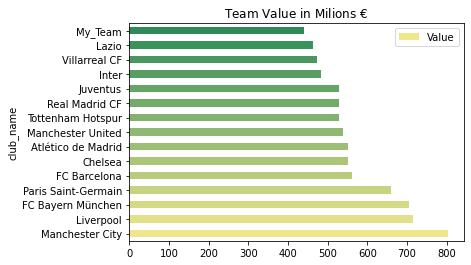

In [ ]:
#comparing teams value
pdf = club_avg1.toPandas()
pdf = pdf.sort_values(by='Value', ascending=False).head(15)
pdf.plot.barh(x = "club_name", y ="Value", color = color1)
plt.title('Team Value in Milions $\N{euro sign}$');

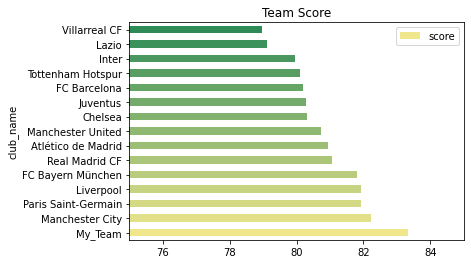

In [ ]:
#comparing teams score
pdf1 = pdf.sort_values(by='score', ascending=False).head(15)
pdf1.plot.barh(x = "club_name", y ="score", color = color1)
plt.xlim(75,85)
plt.title('Team Score');

# Player Value Regression

## Imports

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.sql.functions import col, isnan, when, count, round

## Reading FIFA 22 Dataset

In [ ]:
reg_df = spark.read.csv("/content/datasets/players_22.csv", multiLine=True,
                        inferSchema=True, header=True)\
                        .withColumnRenamed('wage_eur','wage')

In [ ]:
reg_df.printSchema()

root
 |-- sofifa_id: integer (nullable = true)
 |-- player_url: string (nullable = true)
 |-- short_name: string (nullable = true)
 |-- long_name: string (nullable = true)
 |-- player_positions: string (nullable = true)
 |-- overall: integer (nullable = true)
 |-- potential: integer (nullable = true)
 |-- value_eur: double (nullable = true)
 |-- wage: double (nullable = true)
 |-- age: integer (nullable = true)
 |-- dob: timestamp (nullable = true)
 |-- height_cm: integer (nullable = true)
 |-- weight_kg: integer (nullable = true)
 |-- club_team_id: double (nullable = true)
 |-- club_name: string (nullable = true)
 |-- league_name: string (nullable = true)
 |-- league_level: integer (nullable = true)
 |-- club_position: string (nullable = true)
 |-- club_jersey_number: integer (nullable = true)
 |-- club_loaned_from: string (nullable = true)
 |-- club_joined: timestamp (nullable = true)
 |-- club_contract_valid_until: integer (nullable = true)
 |-- nationality_id: integer (nullable = t

In [ ]:
reg_df.show()

+---------+--------------------+-----------------+--------------------+----------------+-------+---------+---------+--------+---+-------------------+---------+---------+------------+-------------------+--------------------+------------+-------------+------------------+----------------+-------------------+-------------------------+--------------+----------------+--------------+---------------+--------------------+--------------+---------+-----------+------------------------+-------------+----------------+---------+------------------+--------------------+--------------------+----+--------+-------+---------+---------+------+------------------+-------------------+--------------------------+-----------------------+-----------------+---------------+-----------+-----------------+------------------+------------------+---------------------+---------------------+----------------+------------------+----------------+----------------+-------------+-------------+--------------+----------------+-----

## Set Up

### Clean the Data
#### Removing uneccesary features
#### Handeling nulls

In [ ]:
# we decided to ignore the goal keepers in this section
# remove player with position 'GK'
# remove the goalkeeping attributes: 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed'

reg_df = reg_df[reg_df['club_position'] != 'GK']
reg_df = reg_df['sofifa_id',
                'short_name',
                'value_eur',
                'wage',
                'overall',
             'potential',
             'age',
             'height_cm',
             'weight_kg',
             'club_team_id',
             'club_name',
             'league_name',
             'league_level',
             'club_jersey_number',
             'nationality_id',
             'nation_team_id',
             'nation_jersey_number',
             'weak_foot',
             'skill_moves',
             'international_reputation',
             'release_clause_eur',
             'pace',
             'shooting',
             'passing',
             'dribbling',
             'defending',
             'physic',
             'attacking_crossing',
             'attacking_finishing',
             'attacking_heading_accuracy',
             'attacking_short_passing',
             'attacking_volleys',
             'skill_dribbling',
             'skill_curve',
             'skill_fk_accuracy',
             'skill_long_passing',
             'skill_ball_control',
             'movement_acceleration',
             'movement_sprint_speed',
             'movement_agility',
             'movement_reactions',
             'power_shot_power',
             'power_jumping',
             'power_stamina',
             'power_strength',
             'power_long_shots',
             'mentality_aggression',
             'mentality_interceptions',
             'mentality_positioning',
             'mentality_vision',
             'mentality_penalties',
             'mentality_composure',
             'defending_marking_awareness',
             'defending_standing_tackle',
             'defending_sliding_tackle']

In [ ]:
reg_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in reg_df.columns]).show()

+---------+----------+---------+----+-------+---------+---+---------+---------+------------+---------+-----------+------------+------------------+--------------+--------------+--------------------+---------+-----------+------------------------+------------------+----+--------+-------+---------+---------+------+------------------+-------------------+--------------------------+-----------------------+-----------------+---------------+-----------+-----------------+------------------+------------------+---------------------+---------------------+----------------+------------------+----------------+-------------+-------------+--------------+----------------+--------------------+-----------------------+---------------------+----------------+-------------------+-------------------+---------------------------+-------------------------+------------------------+
|sofifa_id|short_name|value_eur|wage|overall|potential|age|height_cm|weight_kg|club_team_id|club_name|league_name|league_level|club_jer

In [ ]:
reg_df = reg_df.na.drop(subset=['value_eur','release_clause_eur'])

reg_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in reg_df.columns]).show()

+---------+----------+---------+----+-------+---------+---+---------+---------+------------+---------+-----------+------------+------------------+--------------+--------------+--------------------+---------+-----------+------------------------+------------------+----+--------+-------+---------+---------+------+------------------+-------------------+--------------------------+-----------------------+-----------------+---------------+-----------+-----------------+------------------+------------------+---------------------+---------------------+----------------+------------------+----------------+-------------+-------------+--------------+----------------+--------------------+-----------------------+---------------------+----------------+-------------------+-------------------+---------------------------+-------------------------+------------------------+
|sofifa_id|short_name|value_eur|wage|overall|potential|age|height_cm|weight_kg|club_team_id|club_name|league_name|league_level|club_jer

In [ ]:
# fill null values with the column mean
means = reg_df.agg({col: 'mean' for col in ['pace','shooting','passing','dribbling','defending', 'physic']}).collect()[0]

means1 = [means[i] for i in range(6)]
subset=['pace','shooting','passing','dribbling','defending', 'physic']

for i in range(len(subset)):
  reg_df = reg_df.na.fill(means1[i], subset[i])


In [ ]:
reg_df.describe().show()

+-------+------------------+----------+------------------+------------------+-----------------+-----------------+------------------+------------------+-----------------+-----------------+--------------------+--------------------+------------------+------------------+------------------+------------------+--------------------+------------------+------------------+------------------------+--------------------+------------------+-----------------+------------------+-----------------+------------------+-----------------+------------------+-------------------+--------------------------+-----------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+---------------------+---------------------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+--------------------+-----------------------+---------------------+-----------------+-----------------

### Set up for regression

In [ ]:
# not using nation team related features:'nation_team_id','nation_jersey_number'
input =     ['overall',
             'potential',
             'wage',
             'age',
             'height_cm',
             'weight_kg',
             'club_team_id',
             'league_level',
             'club_jersey_number',
             'nationality_id',
             'weak_foot',
             'skill_moves',
             'international_reputation',
             'release_clause_eur',
             'pace',
             'shooting',
             'passing',
             'dribbling',
             'defending',
             'physic',
             'attacking_crossing',
             'attacking_finishing',
             'attacking_heading_accuracy',
             'attacking_short_passing',
             'attacking_volleys',
             'skill_dribbling',
             'skill_curve',
             'skill_fk_accuracy',
             'skill_long_passing',
             'skill_ball_control',
             'movement_acceleration',
             'movement_sprint_speed',
             'movement_agility',
             'movement_reactions',
             'power_shot_power',
             'power_jumping',
             'power_stamina',
             'power_strength',
             'power_long_shots',
             'mentality_aggression',
             'mentality_interceptions',
             'mentality_positioning',
             'mentality_vision',
             'mentality_penalties',
             'mentality_composure',
             'defending_marking_awareness',
             'defending_standing_tackle',
             'defending_sliding_tackle']


assembler = VectorAssembler(inputCols = input, outputCol = 'features')

In [ ]:
assembler_output = assembler.transform(reg_df)

In [ ]:
assembler_output.select('features').show(10, False)

+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                                                                                                                                             |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[93.0,93.0,320000.0,34.0,170.0,72.0,73.0,1.0,30.0,52.0,4.0,4.0,5.0,1.443E8,85.0,92.0,91.0,95.0,34.0,65.0,85.0,95.0,70.0,91.0,88.0,96.0,93.0,94.0,91.0,96.0,91.0,80.0,91.0,94.0,86.0,68.0,72.0,69.0,94.0,44.0,40.0,93.0,95.0,75.0,96.0,20.0,35.0,24.0]|
|[92.0,9

In [ ]:
final_data = assembler_output.select('features', 'value_eur', 'sofifa_id')

In [ ]:
final_data.show()

+--------------------+---------+---------+
|            features|value_eur|sofifa_id|
+--------------------+---------+---------+
|[93.0,93.0,320000...|    7.8E7|   158023|
|[92.0,92.0,270000...|  1.195E8|   188545|
|[91.0,91.0,270000...|    4.5E7|    20801|
|[91.0,91.0,270000...|   1.29E8|   190871|
|[91.0,91.0,350000...|  1.255E8|   192985|
|[91.0,95.0,230000...|   1.94E8|   231747|
|[90.0,90.0,240000...|  1.295E8|   202126|
|[90.0,90.0,230000...|    1.0E8|   215914|
|[89.0,89.0,350000...|    6.6E7|   165153|
|[89.0,89.0,220000...|   1.04E8|   200104|
|[89.0,89.0,310000...|    8.8E7|   200145|
|[89.0,89.0,230000...|    8.6E7|   203376|
|[89.0,89.0,270000...|   1.01E8|   208722|
|[89.0,89.0,270000...|   1.01E8|   209331|
|[89.0,90.0,160000...|   1.08E8|   212622|
|[88.0,88.0,115000...|    2.4E7|   155862|
|[88.0,88.0,135000...|   4.45E7|   176580|
|[88.0,88.0,310000...|    7.5E7|   182521|
|[88.0,88.0,260000...|   9.35E7|   192505|
|[88.0,88.0,130000...|   1.55E7|   193041|
+----------

In [ ]:
train_data, test_data = final_data.randomSplit([0.8,0.2])

In [ ]:
train_data.describe().show()

+-------+------------------+------------------+
|summary|         value_eur|         sofifa_id|
+-------+------------------+------------------+
|  count|             13920|             13920|
|   mean|2776569.6120689656|231875.82844827586|
| stddev|  7493402.38792807|26752.029466481592|
|    min|            9000.0|                41|
|    max|            1.94E8|            264640|
+-------+------------------+------------------+



In [ ]:
test_data.describe().show()

+-------+-----------------+------------------+
|summary|        value_eur|         sofifa_id|
+-------+-----------------+------------------+
|  count|             3478|              3478|
|   mean|2871098.332374928|231880.47728579643|
| stddev|7893661.341499245|26470.725146094086|
|    min|          20000.0|             18122|
|    max|          1.295E8|            264639|
+-------+-----------------+------------------+



### Run Regression

In [ ]:
reg = LinearRegression(labelCol='value_eur', maxIter=1000)

In [ ]:
reg_model = reg.fit(train_data,)

In [ ]:
print('Coefficients: {} \nIntercept: {}'.format(reg_model.coefficients, reg_model.intercept))

Coefficients: [23781.85540535695,-28763.061855897882,5.750538309736111,-22707.65918966361,-896.1038996170324,4359.1355187224,0.6973862945208691,-2047.6815504901747,121.34778746623648,99.64412948155304,-14605.189596139797,2617.5710387287,669912.5886823724,0.49904188254751614,4251.752789176912,-9775.33885213208,300.84798657000744,20114.46823975954,-9040.427265532782,6203.3671480088615,-1609.7649793493947,5511.954718427241,-1291.3837958510715,435.827715552623,3159.6139372530874,-8987.994688075445,-1734.5469233596782,879.4035404829356,-923.7210074588725,-6270.884012591772,-1681.5112912354869,-1328.6316493087345,723.9153053842793,-2590.6278732882192,2597.5576934036058,452.8350095255823,3049.4251733873075,-1060.2920271154994,562.271831348272,-1090.5392782717406,2128.697759991042,-770.1027218862307,924.8342276120721,-154.77296548207232,238.6796118270546,4279.90378592743,1055.9319823239773,1666.8744864378853] 
Intercept: -413662.46264140785


## Evaluation

In [ ]:
test_results = reg_model.evaluate(test_data)

In [ ]:
test_results.residuals.show()

+-------------------+
|          residuals|
+-------------------+
| -115285.9180044682|
| -172950.7075988917|
| -5770.095697766927|
| 24883.829157039872|
|-138553.51488328062|
| -92341.14486841077|
|-107806.45284464199|
|-127130.59652232483|
| -86334.45834888343|
|-100628.05684258917|
| 202441.25479750347|
|  89759.09322220262|
| 264930.81810402975|
| 210731.78065015888|
|-191854.68062276277|
|-198465.29168070387|
|-147374.73110172641|
| -95265.85801636754|
|-173578.79141887475|
|-265497.50431222236|
+-------------------+
only showing top 20 rows



In [ ]:
unlabeled_data = test_data.select('features','sofifa_id')

In [ ]:
predictions = reg_model.transform(unlabeled_data)

In [ ]:
predictions.show()

+--------------------+---------+-------------------+
|            features|sofifa_id|         prediction|
+--------------------+---------+-------------------+
|[47.0,55.0,500.0,...|   261547|  205285.9180044682|
|[47.0,55.0,800.0,...|   257687|  272950.7075988917|
|[47.0,57.0,1000.0...|   255615| 105770.09569776693|
|[47.0,57.0,2000.0...|   243790|  85116.17084296013|
|[48.0,53.0,1000.0...|   261932| 208553.51488328062|
|[48.0,53.0,2000.0...|   258987| 162341.14486841077|
|[48.0,56.0,500.0,...|   259745|   207806.452844642|
|[48.0,56.0,500.0,...|   255251| 227130.59652232483|
|[48.0,58.0,950.0,...|   261977| 186334.45834888343|
|[48.0,59.0,500.0,...|   259175| 200628.05684258917|
|[48.0,60.0,500.0,...|   262034| -92441.25479750347|
|[48.0,62.0,500.0,...|   264150| 20240.906777797383|
|[48.0,64.0,500.0,...|   261876|-144930.81810402975|
|[48.0,69.0,500.0,...|   260635| -70731.78065015888|
|[49.0,51.0,2000.0...|   257494| 251854.68062276277|
|[49.0,54.0,2000.0...|   243084|  268465.29168

In [ ]:
test_data.select('value_eur','sofifa_id').show()

+---------+---------+
|value_eur|sofifa_id|
+---------+---------+
|  90000.0|   261547|
| 100000.0|   257687|
| 100000.0|   255615|
| 110000.0|   243790|
|  70000.0|   261932|
|  70000.0|   258987|
| 100000.0|   259745|
| 100000.0|   255251|
| 100000.0|   261977|
| 100000.0|   259175|
| 110000.0|   262034|
| 110000.0|   264150|
| 120000.0|   261876|
| 140000.0|   260635|
|  60000.0|   257494|
|  70000.0|   243084|
|  70000.0|   258964|
|  70000.0|   255617|
| 100000.0|   259764|
|  80000.0|   261961|
+---------+---------+
only showing top 20 rows



In [ ]:
print("RMSE: {}".format(test_results.rootMeanSquaredError))
print("MSE: {}".format(test_results.meanSquaredError))

RMSE: 689747.106722455
MSE: 475751071231.99774


In [ ]:
test_data.show()

+--------------------+---------+---------+
|            features|value_eur|sofifa_id|
+--------------------+---------+---------+
|[47.0,55.0,500.0,...|  90000.0|   261547|
|[47.0,55.0,800.0,...| 100000.0|   257687|
|[47.0,57.0,1000.0...| 100000.0|   255615|
|[47.0,57.0,2000.0...| 110000.0|   243790|
|[48.0,53.0,1000.0...|  70000.0|   261932|
|[48.0,53.0,2000.0...|  70000.0|   258987|
|[48.0,56.0,500.0,...| 100000.0|   259745|
|[48.0,56.0,500.0,...| 100000.0|   255251|
|[48.0,58.0,950.0,...| 100000.0|   261977|
|[48.0,59.0,500.0,...| 100000.0|   259175|
|[48.0,60.0,500.0,...| 110000.0|   262034|
|[48.0,62.0,500.0,...| 110000.0|   264150|
|[48.0,64.0,500.0,...| 120000.0|   261876|
|[48.0,69.0,500.0,...| 140000.0|   260635|
|[49.0,51.0,2000.0...|  60000.0|   257494|
|[49.0,54.0,2000.0...|  70000.0|   243084|
|[49.0,55.0,2000.0...|  70000.0|   258964|
|[49.0,55.0,2000.0...|  70000.0|   255617|
|[49.0,56.0,500.0,...| 100000.0|   259764|
|[49.0,56.0,800.0,...|  80000.0|   261961|
+----------

## Combine With Original Data

In [ ]:
comb_df = predictions['sofifa_id','prediction'].join(reg_df,on='sofifa_id')

comb_df.show()


+---------+--------------------+--------------+---------+--------+-------+---------+---+---------+---------+------------+-------------------+--------------------+------------+------------------+--------------+--------------+--------------------+---------+-----------+------------------------+------------------+----+--------+-------+---------+---------+------+------------------+-------------------+--------------------------+-----------------------+-----------------+---------------+-----------+-----------------+------------------+------------------+---------------------+---------------------+----------------+------------------+----------------+-------------+-------------+--------------+----------------+--------------------+-----------------------+---------------------+----------------+-------------------+-------------------+---------------------------+-------------------------+------------------------+
|sofifa_id|          prediction|    short_name|value_eur|    wage|overall|potential|age

In [ ]:
# extracting samples of well-known teams to demonstrate the predictions

ManU = comb_df[comb_df['club_name'] == 'Manchester United']
ManU = ManU['club_name','short_name','value_eur','prediction','overall']
# ManU.write.csv('/content/datasets/ManU')

PSG = comb_df[comb_df['club_name'] == 'Paris Saint-Germain']
PSG = PSG['club_name','short_name','value_eur','prediction','overall']
# PSG.write.csv('/content/datasets/PSG')

Juve = comb_df[comb_df['club_name'] == 'Juventus']
Juve = Juve['club_name','short_name','value_eur','prediction','overall']
Juve.write.csv('/content/datasets/Juve')

Barca =  comb_df[comb_df['club_name'] == 'FC Barcelona']
Barca = Barca['club_name','short_name','value_eur','prediction','overall']
Barca.write.csv('/content/datasets/Barca')

Bayren = comb_df[comb_df['club_name'] == 'FC Bayern München']
Bayren = Bayren['club_name','short_name','value_eur','prediction','overall']
Bayren.write.csv('/content/datasets/Bayren')

ManU.show(), PSG.show(), Juve.show(), Barca.show(), Bayren.show()

+-----------------+--------------+---------+-------------------+-------+
|        club_name|    short_name|value_eur|         prediction|overall|
+-----------------+--------------+---------+-------------------+-------+
|Manchester United|      P. Pogba|   7.95E7| 7.67951153871027E7|     87|
|Manchester United|   M. Rashford|   7.75E7|7.678147925095268E7|     85|
|Manchester United|    H. Maguire|   4.25E7| 4.31122040419305E7|     84|
|Manchester United|    A. Martial|   3.45E7|3.522985643668803E7|     81|
|Manchester United|D. van de Beek|   3.85E7|3.906518210090692E7|     81|
|Manchester United|    J. Lingard|   1.75E7|1.755940507400975E7|     79|
|Manchester United|     Juan Mata|9000000.0|  9987853.793692397|     78|
|Manchester United|     A. Elanga|1700000.0| 1967963.6331371851|     65|
|Manchester United|  S. Shoretire|1200000.0| 1386462.8987428523|     62|
+-----------------+--------------+---------+-------------------+-------+

+-------------------+------------+---------+------

(None, None, None, None, None)

In [ ]:
comb_df.sort('league_name','club_name','value_eur')

comb_df.show()

+---------+--------------------+--------------+---------+--------+-------+---------+---+---------+---------+------------+-------------------+--------------------+------------+------------------+--------------+--------------+--------------------+---------+-----------+------------------------+------------------+----+--------+-------+---------+---------+------+------------------+-------------------+--------------------------+-----------------------+-----------------+---------------+-----------+-----------------+------------------+------------------+---------------------+---------------------+----------------+------------------+----------------+-------------+-------------+--------------+----------------+--------------------+-----------------------+---------------------+----------------+-------------------+-------------------+---------------------------+-------------------------+------------------------+
|sofifa_id|          prediction|    short_name|value_eur|    wage|overall|potential|age

# End spark session

In [ ]:
spark.stop()